# EDA

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Usuarios/Alfredo/DS4B/Python DS Mastery/EstructuraDirectorio/03_MACHINE_LEARNING/07_CASOS/03_RIESGOS'

Nombres de los ficheros de datos.

In [3]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [4]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

## EDA CATEGÓRICAS

### Análisis estadístico

In [5]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139088 entries, 137387967 to 94394801
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   empleo                139088 non-null  object
 1   antigüedad_empleo     139088 non-null  object
 2   ingresos_verificados  139088 non-null  object
 3   rating                139088 non-null  object
 4   vivienda              139088 non-null  object
 5   descripcion           139088 non-null  object
 6   finalidad             139088 non-null  object
 7   num_cuotas            139088 non-null  object
 8   estado                139088 non-null  object
dtypes: object(9)
memory usage: 10.6+ MB


In [13]:
variables = ['antigüedad_empleo', 'ingresos_verificados', 'rating', 'vivienda',
       'finalidad', 'num_cuotas', 'estado']

# saco empleo porque son muchas categorías

In [14]:
def frecuencias_cat(df_cat):
    resultado = df_cat[variables].apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [15]:
frecuencias_cat(cat)

,Variable,Valor,Frecuencia
9,antigüedad_empleo,9 years,0.035833
8,antigüedad_empleo,8 years,0.040428
7,antigüedad_empleo,7 years,0.041096
6,antigüedad_empleo,6 years,0.045173
4,antigüedad_empleo,4 years,0.061371
5,antigüedad_empleo,5 years,0.062299
11,antigüedad_empleo,desconocido,0.064822
0,antigüedad_empleo,1 year,0.065469
3,antigüedad_empleo,3 years,0.080460
10,antigüedad_empleo,< 1 year,0.084119


### Análisis gráfico

In [16]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

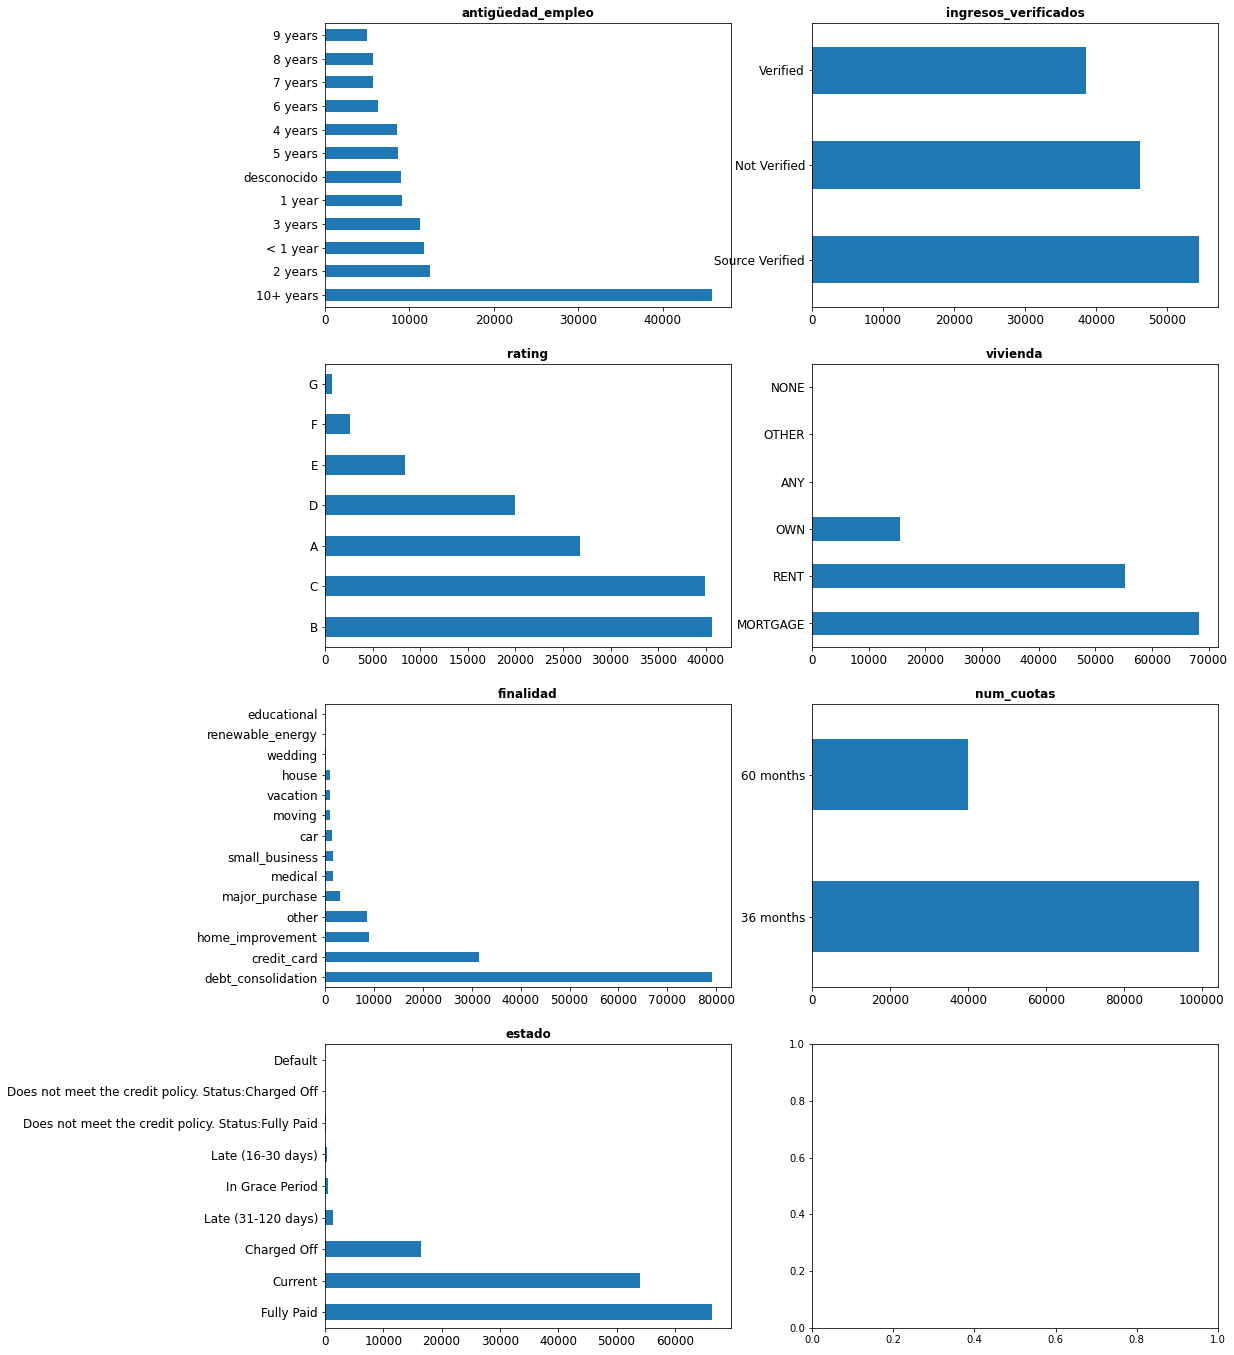

In [19]:
graficos_eda_categoricos(cat[variables])

#graficos_eda_categoricos(cat)

Conclusiones:

En transformación:

* En vivienda juntar ANY, NONE y OTHER a la categoria mayoritaria
* En finalidad juntar renewable_energy, educational y wedding en 'otros'
* Crear la target a partir de estado

## EDA NUMÉRICAS

### Análisis estadístico

In [20]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [21]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
ingresos,139088.0,75213.958607,65000.00,42406.985560,0.00,46000.00,65000.00,92000.00,300000.00
dti,139088.0,18.837526,17.81,14.535833,-1.00,11.95,17.81,24.43,999.00
num_hipotecas,139088.0,1.510713,1.00,1.879983,0.00,0.00,1.00,2.00,32.00
num_lineas_credito,139088.0,11.585514,11.00,5.615807,0.00,8.00,11.00,14.00,91.00
porc_tarjetas_75p,139088.0,41.164941,33.30,36.472423,0.00,0.00,33.30,66.70,100.00
porc_uso_revolving,139088.0,50.383638,50.40,24.707090,0.00,31.70,50.40,69.40,366.60
num_cancelaciones_12meses,139088.0,0.008211,0.00,0.103663,0.00,0.00,0.00,0.00,7.00
num_derogatorios,139088.0,0.198493,0.00,0.570206,0.00,0.00,0.00,0.00,46.00
num_meses_desde_ult_retraso,139088.0,16.700973,0.00,22.977317,0.00,0.00,0.00,30.00,195.00
principal,139088.0,14979.811163,12800.00,9134.644195,600.00,8000.00,12800.00,20000.00,40000.00


### Análisis gráfico

In [17]:
def graficos_eda_continuas(num):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

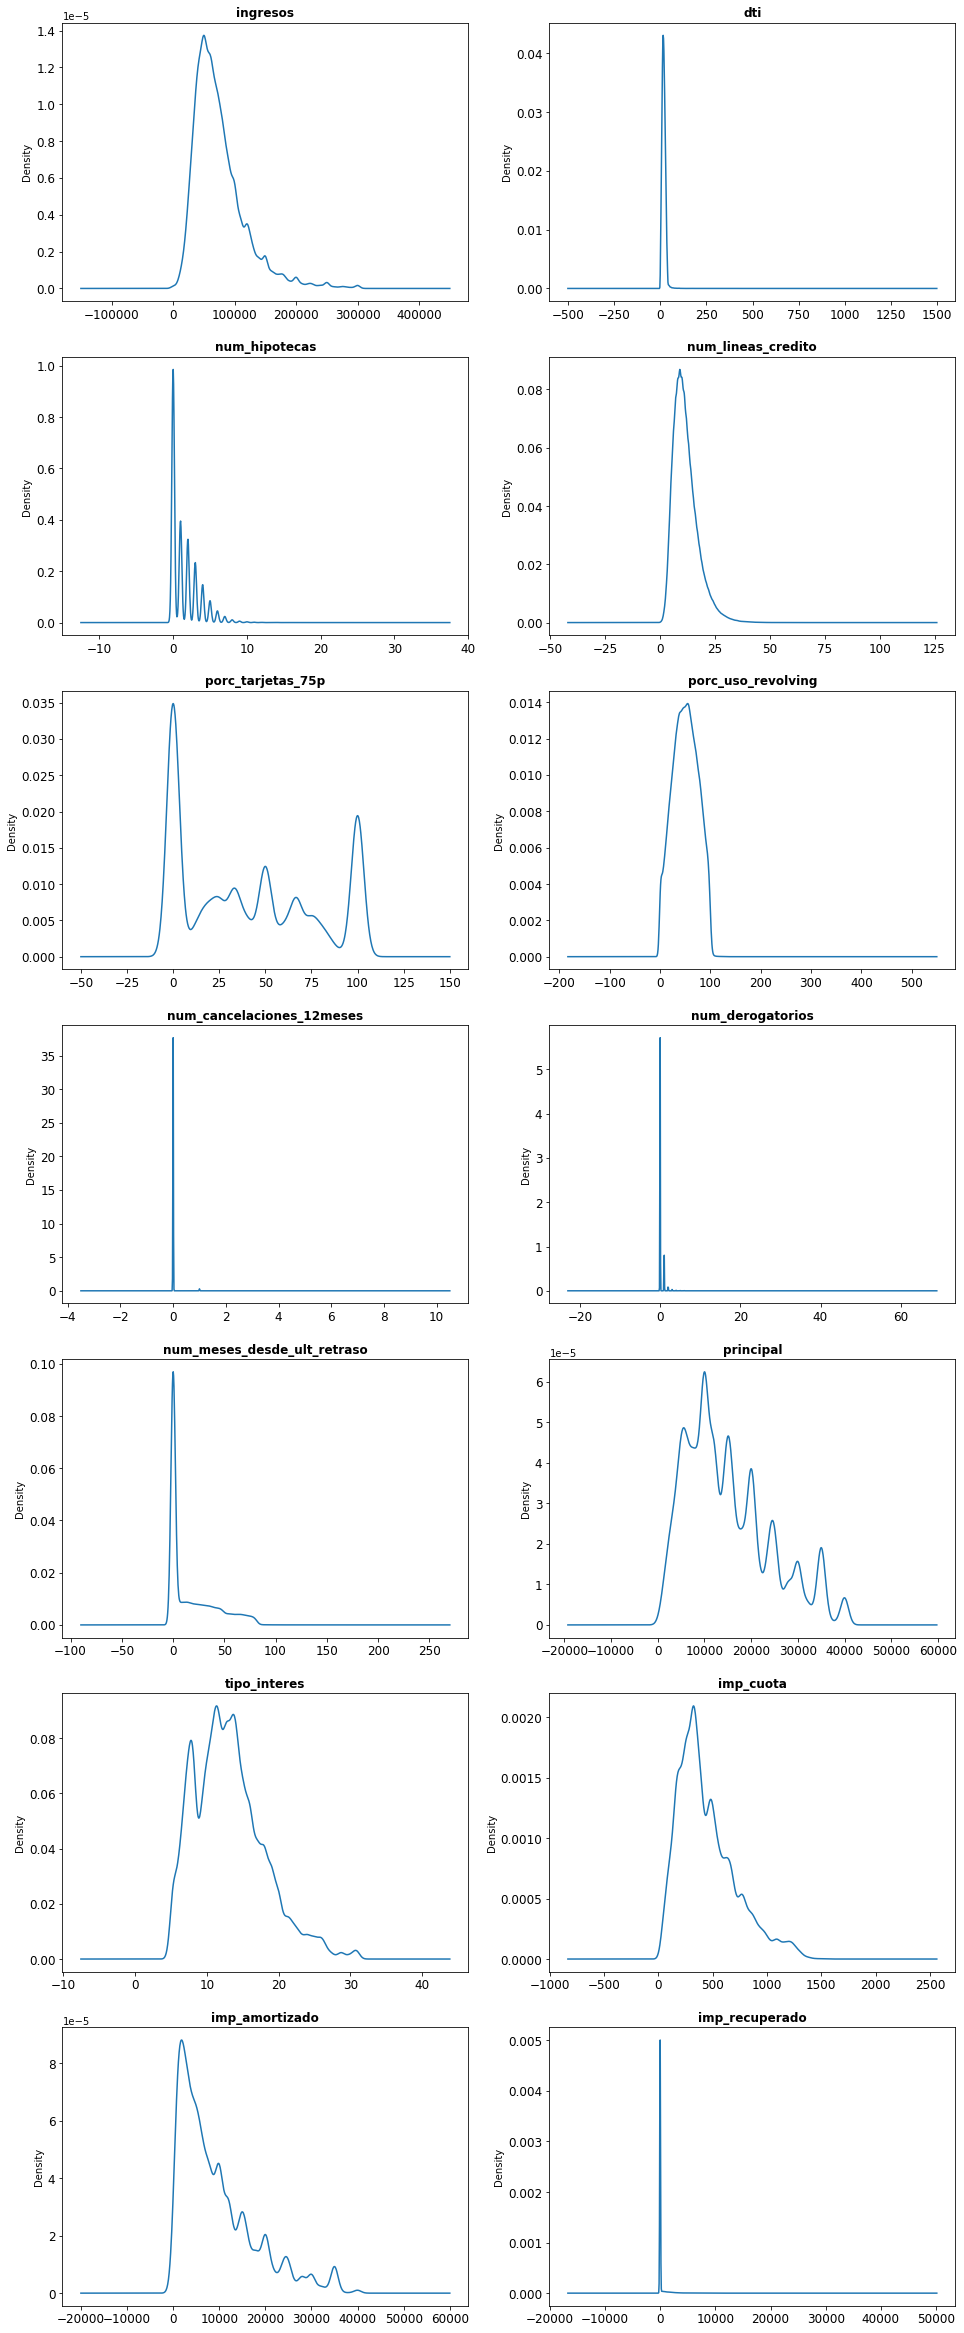

In [18]:
graficos_eda_continuas(num)

Vamos a analizar el detalle de imp_amortizado e imp_recuperado, ya que son relevantes para la target del modelo LGD. Con los ratios lo que se logra es verificar la coherencia de estas variables, registro a registro y no solamente en la verificación de los máximos y mínimos generales.

In [22]:
ratios = num[['principal','imp_amortizado','imp_recuperado']].copy()

In [23]:
ratios['r_amortizado_principal'] = ratios.imp_amortizado / ratios.principal
ratios['r_recuperado_principal'] = ratios.imp_recuperado / ratios.principal

In [24]:
ratios.describe().T

,count,mean,std,min,25%,50%,75%,max
principal,139088.0,14979.811163,9134.644195,600.0,8000.000000,12800.000000,20000.0,40000.000000
imp_amortizado,139088.0,9470.531541,8262.060377,0.0,3000.000000,7000.000000,13800.0,40000.000000
imp_recuperado,139088.0,143.743070,758.030827,0.0,0.000000,0.000000,0.0,33407.160000
r_amortizado_principal,139088.0,0.662778,0.369426,0.0,0.274767,0.872024,1.0,1.000012
r_recuperado_principal,139088.0,0.008943,0.041474,0.0,0.000000,0.000000,0.0,1.220774


Conclusiones:

* En transformación convertir num_derogatorios a binaria
* Revisar en profundidad la relación entre estado e imp_recuperado
* AR: el dti no puede ser menor que cero
* AR: num_derogatorios lo podriamos convertir en una variable binaria 0-1 dado que hay pocos registros que tienen algún derogatorio
* AR: la variable porc_tarjetas_75p podríamos pasarla a categórica, donde se distinguen 3 grandes grupos, los que no superaron el 75% del límite, los que lo alcanzaron y los que está a tope del límite (de todas formas hay que ver bien lo que significa esta variable -no me cierra lo del 75%-)


In [25]:
temp = cat[['estado']].merge(num[['imp_recuperado']], left_index=True, right_index=True)
temp.groupby('estado').imp_recuperado.mean()

estado
Charged Off                                            1217.259901
Current                                                   0.000000
Default                                                   0.000000
Does not meet the credit policy. Status:Charged Off     457.450192
Does not meet the credit policy. Status:Fully Paid        0.000000
Fully Paid                                                0.000000
In Grace Period                                           0.000000
Late (16-30 days)                                         0.000000
Late (31-120 days)                                        0.000000
Name: imp_recuperado, dtype: float64

Efectivamente sólo hay importe recuperado en el estado Charged Off.

## GUARDAR DATASETS TRAS EDA

Guarda los avances en cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

*NOTA: En algunos casos no hay cambios en los ficheros en esta fase, así que este paso es opcional.Pero si no guardas estos ficheros acuérdate de modificar la importación en el siguiente notebook.*

In [26]:
#Definir los nombres de los archivos
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [27]:
#Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)